In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.python import keras

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [2]:
CATEGORIES = ['African Elephant','Amur Leopard','Arctic Fox','Black Rhino','Black Spider Monkey','Bluefin Tuna','Brown Bear','Chimpanzee','European Rabbit','Orangutan']

In [3]:
img_size = 224

In [4]:
def get_data(data_dir):
    data = [] 
    for label in CATEGORIES: 
        path = os.path.join(data_dir, label)
        class_num = CATEGORIES.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
train = get_data(r'F:\programme\Animal species recognition\inital_dataset')
val = get_data(r'F:\programme\Animal species recognition\test_dataset')

<ipython-input-4-6f12c4fc2ab6>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


In [6]:
for label in CATEGORIES: 
    print(CATEGORIES.index(label))

0
1
2
3
4
5
6
7
8
9


In [7]:
train.ndim

2

In [8]:
val.ndim

2

In [9]:
#train.class_indices

C:\Users\zeewo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

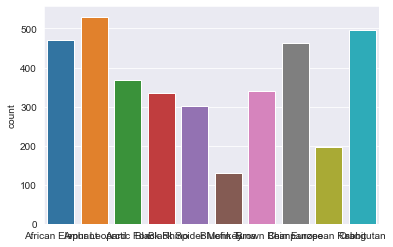

In [10]:
l = []
for i in train:
    if(i[1] == 0):
        l.append('African Elephant')
    if(i[1] == 1):
        l.append('Amur Leopard')
    if(i[1] == 2):
        l.append('Arctic Fox')
    if(i[1] == 3):
        l.append('Black Rhino')
    if(i[1] == 4):
        l.append('Black Spider Monkey')    
    if(i[1] == 5):
        l.append('Bluefin Tuna')    
    if(i[1] == 6):
        l.append('Brown Bear')    
    if(i[1] == 7):
        l.append('Chimpanzee')    
    if(i[1] == 8):
        l.append('European Rabbit')    
    if(i[1] == 9):
        l.append('Orangutan')
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'African Elephant')

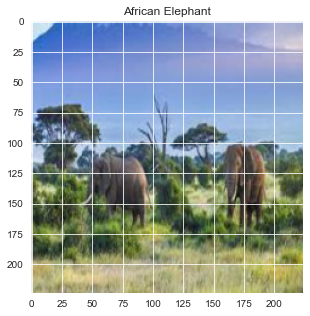

In [11]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(CATEGORIES[train[0][1]])

Text(0.5, 1.0, 'Orangutan')

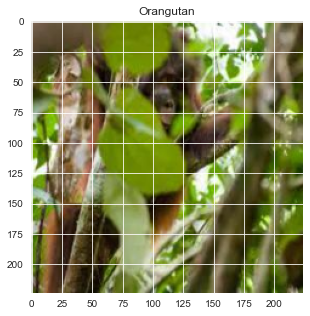

In [12]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(CATEGORIES[train[-1][1]])

In [13]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [14]:
y_train.shape

(3628,)

In [15]:
x_train.shape

(3628, 224, 224, 3)

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [17]:
x_train.shape

(3628, 224, 224, 3)

In [18]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

In [19]:
model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())



In [20]:
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))



In [21]:
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="softmax"))



In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [23]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [24]:
history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))

Epoch 1/10
114/114 [==============================] - 118s 1s/step - loss: 2.2925 - accuracy: 0.1102 - val_loss: 2.3050 - val_accuracy: 0.1222
Epoch 2/10
114/114 [==============================] - 109s 960ms/step - loss: 2.2382 - accuracy: 0.1580 - val_loss: 2.3090 - val_accuracy: 0.1000
Epoch 3/10
114/114 [==============================] - 110s 963ms/step - loss: 2.2136 - accuracy: 0.1774 - val_loss: 2.3035 - val_accuracy: 0.1056
Epoch 4/10
114/114 [==============================] - 110s 967ms/step - loss: 2.1946 - accuracy: 0.1753 - val_loss: 2.2904 - val_accuracy: 0.1167
Epoch 5/10
114/114 [==============================] - 113s 988ms/step - loss: 2.1851 - accuracy: 0.1915 - val_loss: 2.2765 - val_accuracy: 0.1444
Epoch 6/10
114/114 [==============================] - 115s 1s/step - loss: 2.1640 - accuracy: 0.2117 - val_loss: 2.2550 - val_accuracy: 0.1722
Epoch 7/10
114/114 [==============================] - 110s 964ms/step - loss: 2.1475 - accuracy: 0.2420 - val_loss: 2.2314 - val_a

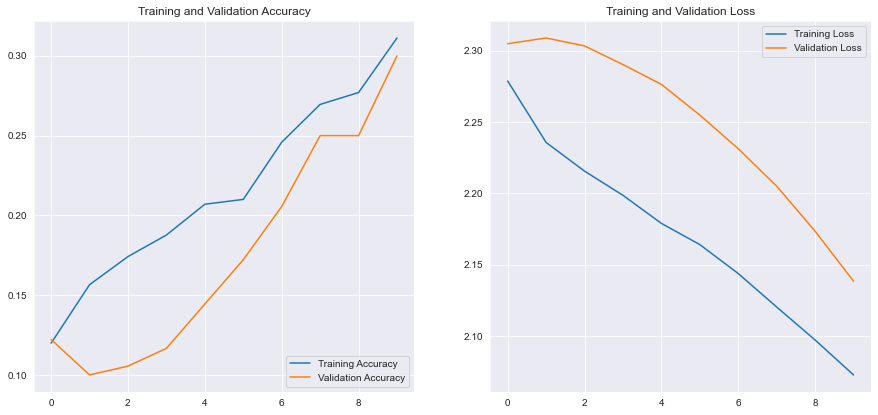

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['African Elephant (Class 0)','Amur Leopard (Class 1)','Arctic Fox (Class 2)','Black Rhino (Class 3)','Black Spider Monkey (Class 4)','Bluefin Tuna (Class 5)','Brown Bear (Class 6)','Chimpanzee (Class 7)','European Rabbit (Class 8)','Orangutan (Class 9)']))

C:\Users\zeewo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                               precision    recall  f1-score   support

   African Elephant (Class 0)       0.30      0.50      0.37        18
       Amur Leopard (Class 1)       0.24      0.89      0.37        18
         Arctic Fox (Class 2)       0.52      0.78      0.62        18
        Black Rhino (Class 3)       0.00      0.00      0.00        18
Black Spider Monkey (Class 4)       0.00      0.00      0.00        18
       Bluefin Tuna (Class 5)       1.00      0.33      0.50        18
         Brown Bear (Class 6)       0.00      0.00      0.00        18
         Chimpanzee (Class 7)       0.50      0.11      0.18        18
    European Rabbit (Class 8)       0.00      0.00      0.00        18
          Orangutan (Class 9)       0.16      0.39      0.22        18

                     accuracy                           0.30       180
                    macro avg       0.27      0.30      0.23       180
                 weighted avg       0.27      0.30      0.23       180



C:\Users\zeewo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zeewo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zeewo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from keras.models import model_from_json

In [37]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save("model1.h5")
print("Saved model to disk")

Saved model to disk


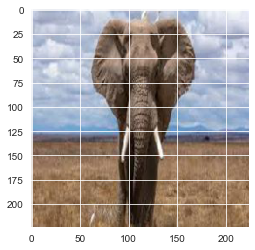

African Elephant
[[1.0000000e+00 2.8064322e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 4.8158811e-29 0.0000000e+00 2.6435969e-24]]


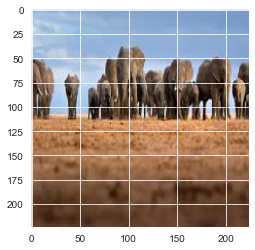

Orangutan
[[5.3571858e-10 1.1270215e-17 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.8588955e-20 0.0000000e+00 1.0000000e+00]]


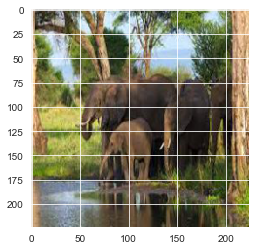

Orangutan
[[3.3904056e-33 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 3.1751984e-20 0.0000000e+00 1.0000000e+00]]


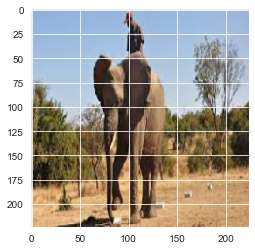

African Elephant
[[1.0000000e+00 3.3623860e-29 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.8749466e-36]]


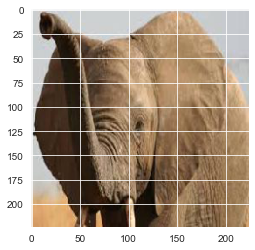

Orangutan
[[1.7168730e-07 9.7039598e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.1194373e-25 0.0000000e+00 9.9999988e-01]]


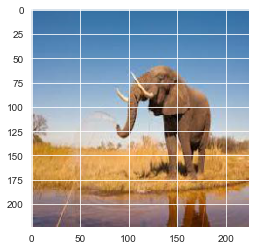

Amur Leopard
[[1.1499308e-30 1.0000000e+00 4.9134343e-21 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


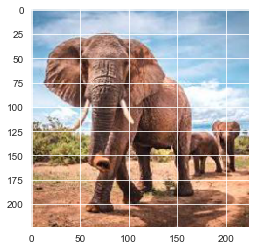

African Elephant
[[1.0000000e+00 1.0150812e-23 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6387277e-21]]


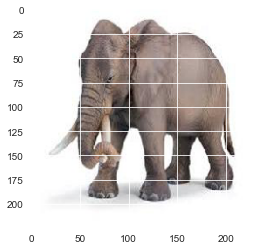

African Elephant
[[1.0000000e+00 0.0000000e+00 6.0558367e-13 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


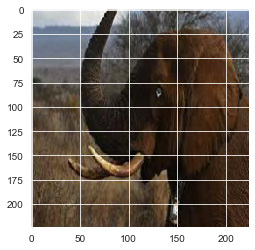

Orangutan
[[6.5437234e-05 9.5553679e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.2860171e-34 7.7183508e-24 0.0000000e+00 9.9993455e-01]]


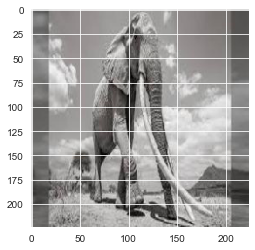

Amur Leopard
[[0.000000e+00 1.000000e+00 7.819889e-09 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]


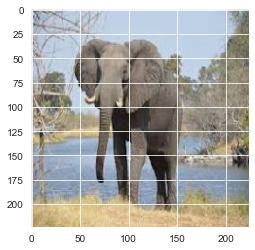

African Elephant
[[1.0000000e+00 2.7281034e-34 3.0900407e-17 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


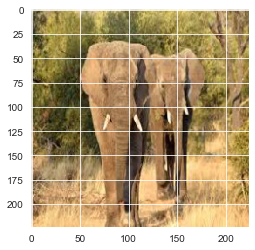

Orangutan
[[4.7891847e-23 1.9608632e-09 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]]


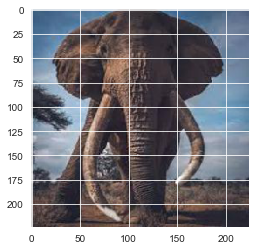

Amur Leopard
[[2.1961973e-16 1.0000000e+00 4.0994426e-14 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


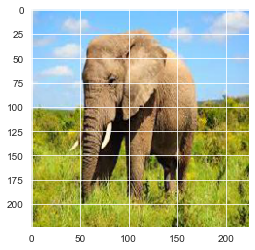

African Elephant
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6483993e-24]]


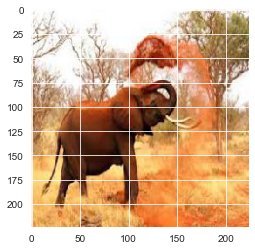

Orangutan
[[1.340944e-21 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00]]


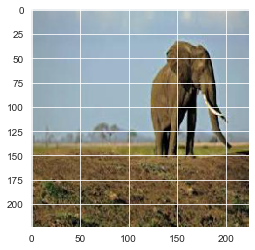

African Elephant
[[1.0000000e+00 4.9038670e-13 5.5811209e-25 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 3.1147047e-24 0.0000000e+00 1.2157697e-15]]


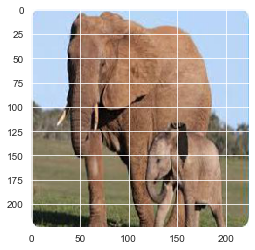

African Elephant
[[1.0000000e+00 1.6613139e-33 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 8.8966360e-29 0.0000000e+00 1.4322863e-15]]


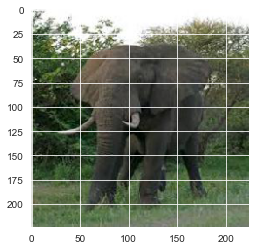

African Elephant
[[9.9989617e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 7.9470752e-05 0.0000000e+00 2.4284966e-05]]


In [34]:
dir_path = r'F:\programme\Animal species recognition\test_dataset\African Elephant'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    
    val = model.predict(images)
    pred_name = CATEGORIES[np.argmax(val)]
    print(pred_name)
    print(val)

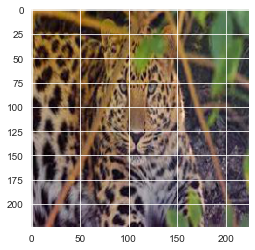

Amur Leopard
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


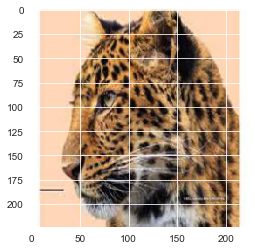

Orangutan
[[0.000000e+00 9.006011e-28 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00]]


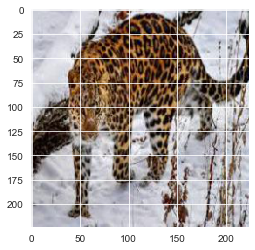

Amur Leopard
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


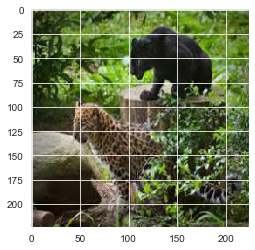

Amur Leopard
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.1136703e-32]]


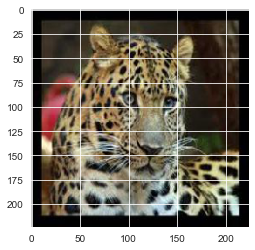

Amur Leopard
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


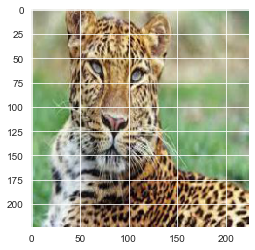

Amur Leopard
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


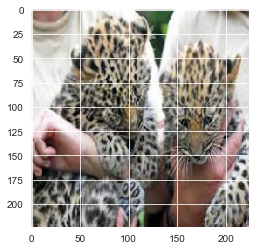

Amur Leopard
[[1.9430481e-18 9.9731666e-01 7.8543347e-35 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.9837570e-09 0.0000000e+00 2.6832763e-03]]


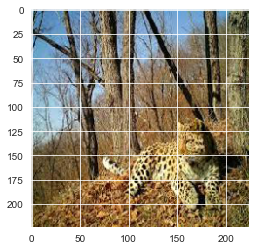

Amur Leopard
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.7906634e-34]]


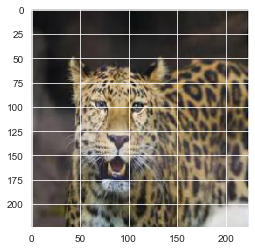

Amur Leopard
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


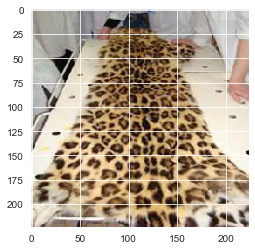

Amur Leopard
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.8623208e-31]]


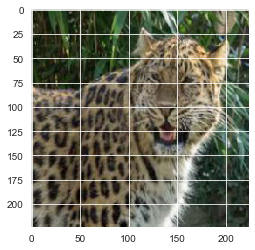

Amur Leopard
[[0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 9.420665e-28]]


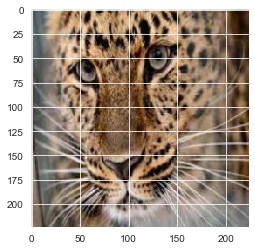

Amur Leopard
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


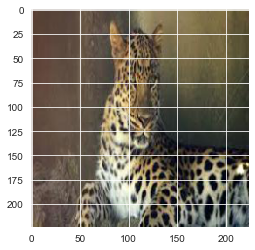

Amur Leopard
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


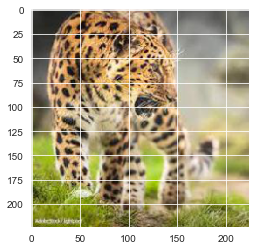

Amur Leopard
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


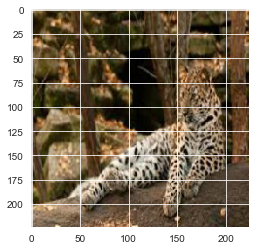

Amur Leopard
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


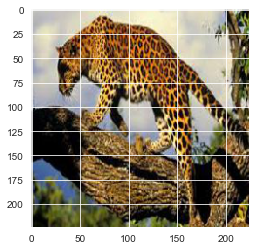

Amur Leopard
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.7363658e-21]]


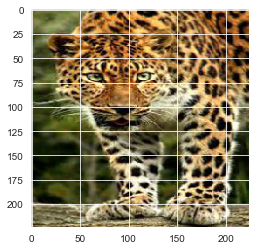

Amur Leopard
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


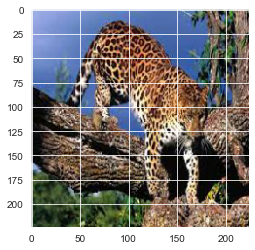

Amur Leopard
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [36]:
dir_path = r'F:\programme\Animal species recognition\test_dataset\Amur Leopard'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    
    val = model.predict(images)
    pred_name = CATEGORIES[np.argmax(val)]
    print(pred_name)
    print(val)